<a href="https://colab.research.google.com/github/nithinrk11/Feynn-Labs-Machine-Learning-Internship/blob/main/McDonalds_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Access the dataset

In [ ]:

url = 'https://raw.githubusercontent.com/nithinrk11/Feynn-Labs-Machine-Learning-Internship/main/Project2/dataset/mcdonalds.csv'

!wget $url


--2024-08-15 22:16:38--  https://raw.githubusercontent.com/nithinrk11/Feynn-Labs-Machine-Learning-Internship/main/Project2/dataset/mcdonalds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96988 (95K) [text/plain]
Saving to: ‘mcdonalds.csv’

mcdonalds.csv       100%[===================>]  94.71K  --.-KB/s    in 0.003s  

2024-08-15 22:16:38 (31.7 MB/s) - ‘mcdonalds.csv’ saved [96988/96988]



###Installing Dependencies

In [ ]:
!pip install bioinfokit
!pip install graphviz pydotplus
!pip install yellowbrick
!pip install statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings
import statsmodels.api as sm
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import graphviz
from IPython.display import Image, display
from statsmodels.graphics.mosaicplot import mosaic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=edb297405bedffb58c8d9e361efab3ab83eebb1edcf3d1a651edaf56dad67920
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


#**Exploratory Data Analysis**


In [ ]:
#loading the dataset and peek into some data
df = pd.read_csv('/content/mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
df.shape

(1453, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


##Checking for unique values

In [ ]:
#responses of "likness"

print("Responses found in 'Like': \n",df['Like'].unique(), "\n")

# Counting the values in the 'Like' column
like_counts = df['Like'].value_counts()

# Sorting the counts by the numeric "Like" value
sorted_value_counts = like_counts.sort_index()

# Printing the sorted value counts
print("value counts of column: ", sorted_value_counts)


Responses found in 'Like': 
 ['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1'] 

value counts of column:  Like
+1              152
+2              187
+3              229
+4              160
-1               58
-2               59
-3               73
-4               71
0               169
I hate it!-5    152
I love it!+5    143
Name: count, dtype: int64


The "Like" column contains mostly numeric customer ratings, but two responses include comments with numeric values (`'I love it! +5'` and `'I hate it! -5'`). These can be processed later for accurate numeric calculations.

In [ ]:
print("Age types found are: \n",df['Age'].unique(), "\n")

Age types found are: 
 [61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71] 



In [ ]:
print("Response types found in 'VisitFrequency': \n",df['VisitFrequency'].unique(), "\n")
print("Value counts of column:",df['VisitFrequency'].value_counts())

Response types found in 'VisitFrequency': 
 ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never'] 

Value counts of column: VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64


**Note:**
* We can observe most of the responses are verbal, not numeric, and the `Like`,  `VistFrequency`, and `Age` columns  contains `multi variate responses`.
* Responses which are `Yes` and `No` for can be label encoded to `numeric binary` at later stage to data preprcessing which help is a suitable for segmenat extraction.

---
#**Visualization**

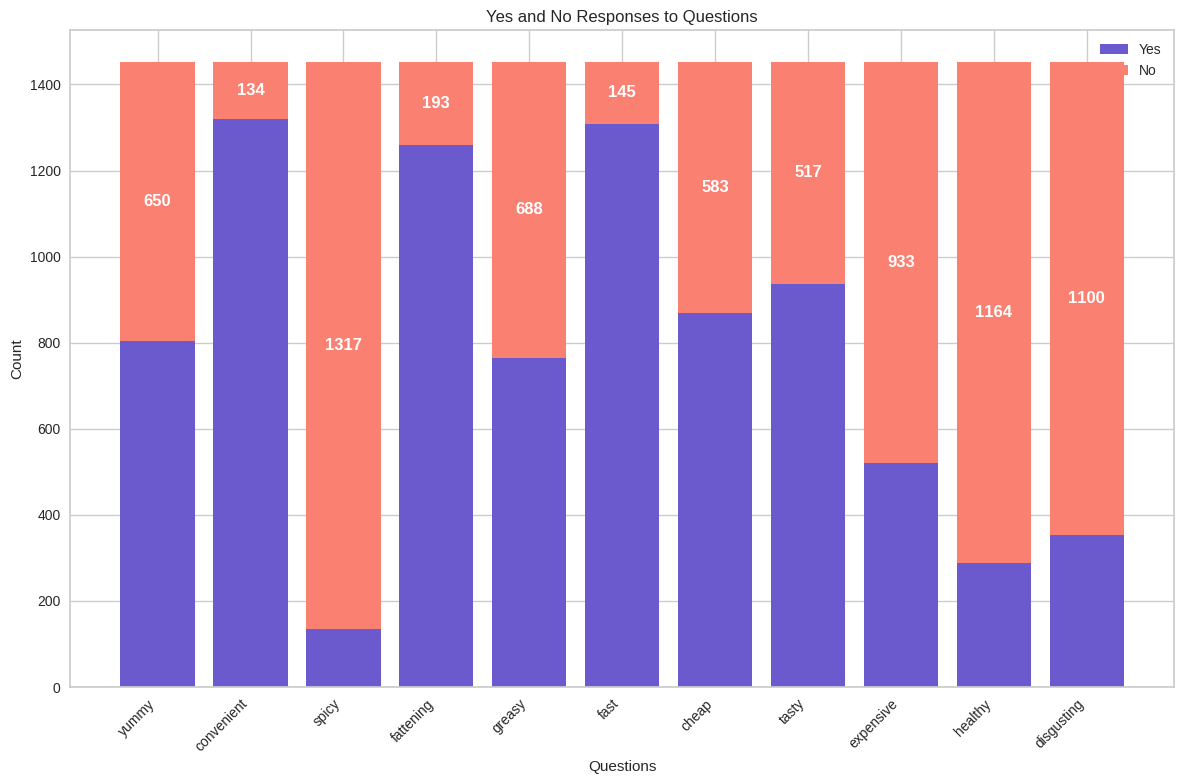

In [ ]:
# @title Visualising responses from customers

# Extracting data from columns 0 to 10
df_subset = df.iloc[:, 0:11]

# Counting 'Yes' and 'No' responses for each column
yes_counts = (df_subset == 'Yes').sum()
no_counts = (df_subset == 'No').sum()



plt.figure(figsize=(12, 8))
bars1 = plt.bar(yes_counts.index, yes_counts.values, label='Yes', color='slateblue')
bars2 = plt.bar(no_counts.index, no_counts.values, bottom=yes_counts.values, label='No', color='salmon')

plt.xlabel('Questions')
plt.ylabel('Count')
plt.title('Yes and No Responses to Questions')

# Annotating 'No' counts on each bar for better readbility
for bar, count in zip(bars2, no_counts.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position of the label (center of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y position of the label (middle of the bar)
        str(count),  # The text (count of 'No')
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        color='white',  # Text color
        fontweight='bold'  # Text style
    )

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

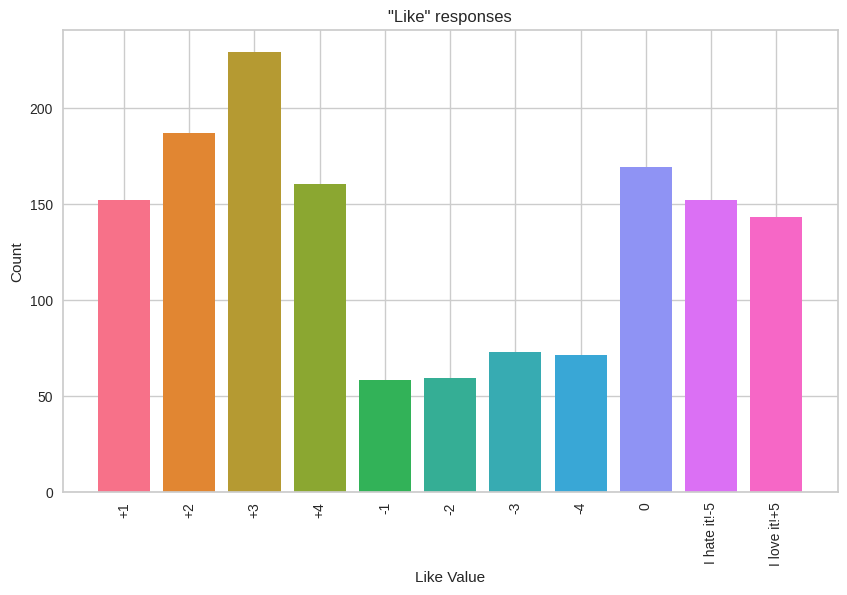

In [ ]:
# @title Visualising likness responses

plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(sorted_value_counts))

plt.bar(sorted_value_counts.index, sorted_value_counts.values, color=colors, zorder=2)
plt.grid(axis='y', zorder=1)
plt.xlabel('Like Value')
plt.ylabel('Count')
plt.title('"Like" responses')
plt.xticks(sorted_value_counts.index, rotation=90)
plt.xticks(sorted_value_counts.index)

plt.show()

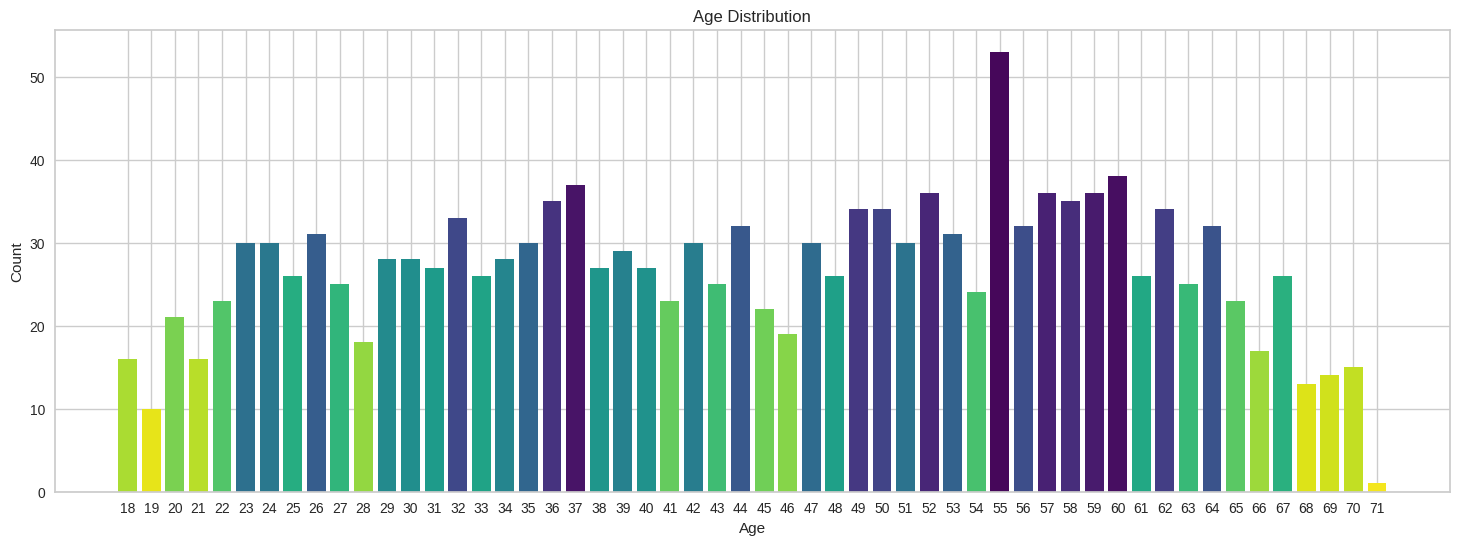

In [ ]:
# @title Age Distribution
# Counting the frequency of each age group
age_counts = df['Age'].value_counts()


plt.figure(figsize=(18, 6))
colors = sns.color_palette("viridis", len(age_counts))
plt.bar(age_counts.index, age_counts.values, color=colors, zorder=2)
plt.grid(axis='y', zorder=1)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xticks(age_counts.index)
plt.show()

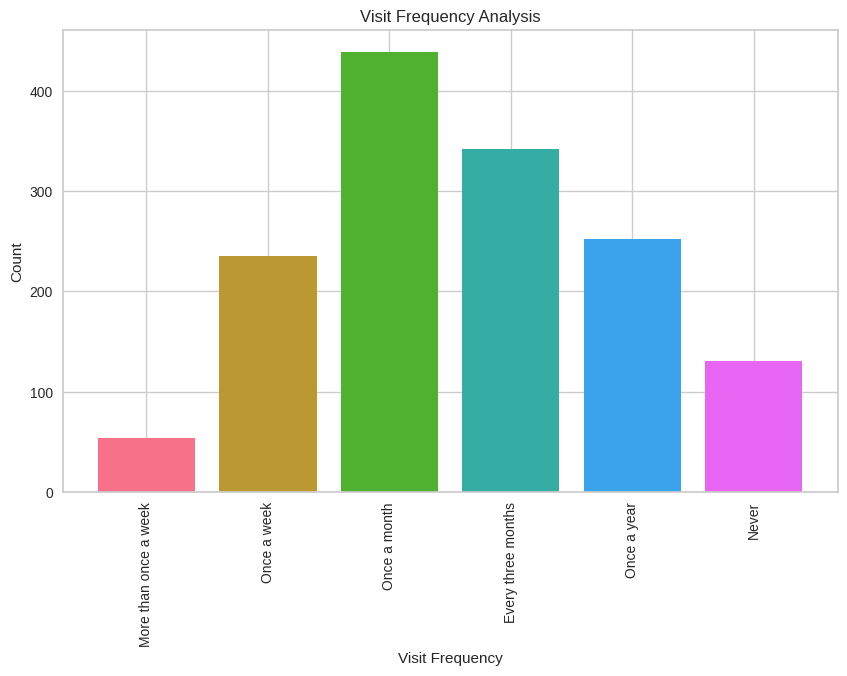

In [ ]:
# @title Visit Frequency Analysis
visit_order = ["More than once a week", "Once a week", "Once a month",
               "Every three months", "Once a year", "Never"]

# Convertng the VisitFrequency column to a categorical type with the specified order
df['VisitFrequency'] = pd.Categorical(df['VisitFrequency'], categories=visit_order, ordered=True)

# Counting the frequency of each response using the custom order
visit_frequency = df['VisitFrequency'].value_counts().reindex(visit_order)

plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(visit_frequency))

plt.bar(visit_frequency.index, visit_frequency.values, color=colors)
plt.xlabel('Visit Frequency')
plt.ylabel('Count')
plt.title('Visit Frequency Analysis')
plt.xticks(rotation=90)

plt.show()

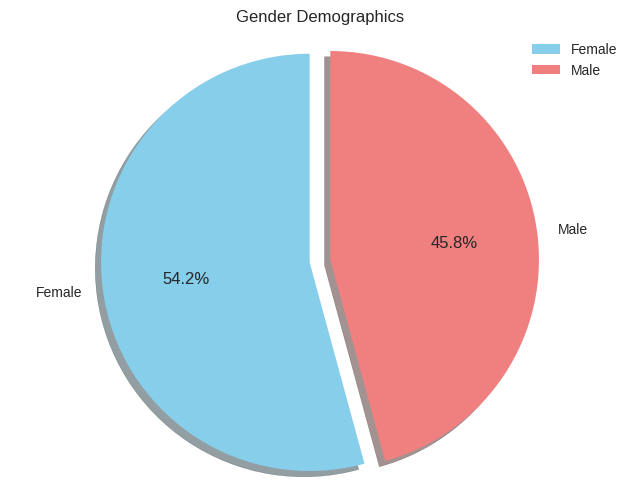

In [ ]:
# @title Gender Demographics

# Counting the occurrences of each gender
gender_counts = df['Gender'].value_counts()


plt.figure(figsize=(8, 6))
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('Gender Demographics')


plt.legend(gender_counts.index, loc='best')

plt.axis('equal')
plt.show()

 -----
 ## **Data Preprocessing**

Let's convert the columns containing `Yes` & `No` responses to numeric binary i.e., `'1' for 'Yes'` and `'0' for 'No'` with binary encoding.

In [ ]:
#converting 'yes' 'no' responses to binary
columns_to_map = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting']
df[columns_to_map] = df[columns_to_map].applymap({'Yes': 1, 'No': 0}.get)

print()

#checking the converted dataset
df.head()


<ipython-input-14-c05ed6a75589>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_to_map] = df[columns_to_map].applymap({'Yes': 1, 'No': 0}.get)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [ ]:
mean_values = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting']].mean().round(2)
mean_values

,0
yummy,0.55
convenient,0.91
spicy,0.09
fattening,0.87
greasy,0.53
fast,0.90
cheap,0.60
tasty,0.64
expensive,0.36
healthy,0.20


We can observe that the average values of the transformed binary numeric segmentation variables
indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY,
91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that
McDonald’s food is SPICY

##**Principle Component Analysis**
> Another way to explore the data is through performing Prinicple Component Analysis and Perceptual Mapping, that could offer insights into how customers rated different attributes.

In [ ]:
#lets take a copy of the dataset except columns 'like', 'age', 'visitfrquency' and 'gender' to perform pca
df_copy = df.iloc[:, :11].copy()
df_copy.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [ ]:
#fitting PCA
pca = PCA()
pca.fit(df_copy)

PCA()

In [ ]:
# Standard deviations of each principal component
std_devs = np.sqrt(pca.explained_variance_)

# Proportion of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative proportion of variance explained
cumulative_proportion = np.cumsum(explained_variance_ratio)


In [ ]:
# Create a DataFrame to display the results
results = pd.DataFrame({
    'Standard Deviation': std_devs,
    'Proportion of Variance': explained_variance_ratio,
    'Cumulative Proportion': cumulative_proportion
}, index=[f'PC{i+1}' for i in range(pca.n_components_)])




results = results.round(5)

results


,Standard Deviation,Proportion of Variance,Cumulative Proportion
PC1,0.75705,0.29945,0.29945
PC2,0.60746,0.19280,0.49224
PC3,0.50462,0.13305,0.62529
PC4,0.39880,0.08310,0.70839
PC5,0.33741,0.05948,0.76787
PC6,0.31027,0.05030,0.81817
PC7,0.28970,0.04385,0.86201
PC8,0.27512,0.03955,0.90156
PC9,0.26525,0.03676,0.93832
PC10,0.24884,0.03235,0.97068


* Above Results indicate that the first two components capture almost about 50% of the information contained in the segmentation variables.


Now let's check the PCA loadings.

In [ ]:
# Get the PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=df_copy.columns)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


 * We can observe that for principal component 2 are `CHEAP` and `EXPENSIVE` has the highest loading segmentation variables.


##**Perceptual Mapping**

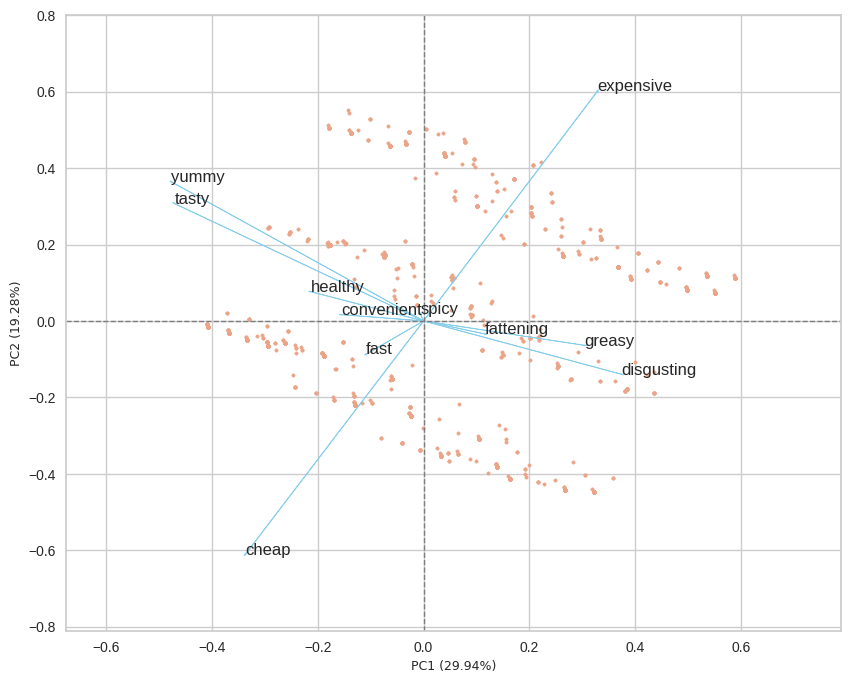

In [ ]:
# Perceptual map using biplot
cluster.biplot(cscore=pca.transform(df_copy),
               loadings=pca.components_, labels=df_copy.columns,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2),
               show=True, dim=(10,8))

* Attributes `CHEAP` and `EXPENSIVE` in the above plot can be seen quite independent of other attributes.
* The remaining attributes can be interpreted as positive versus negative perceptions: `FATTENING`,
`DISGUSTING` and `GREASY` point in the same direction in the perceptual chart,
indicating that respondents who view McDonald’s as `FATTENING`, `DISGUSTING` are
also likely to view it as `GREASY`.
*Results also indicate that some attributes are strongly interrelated.

---
#**Extracting Segments**

In [ ]:
# Suppress all FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# Range of number of clusters to test
num_segments = range(2, 9)
segment_solutions = []

for k in num_segments:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_copy)
    segment_solutions.append(kmeans)
# Calculate ARI for each segmentation
ari_scores = []
for i in range(len(segment_solutions) - 1):
    ari = adjusted_rand_score(segment_solutions[i].labels_, segment_solutions[i + 1].labels_)
    ari_scores.append(ari)

# Print ARI scores
for i, score in enumerate(ari_scores):
    print(f"ARI between {i+2} and {i+3} segments: {score:.2f}")


ARI between 2 and 3 segments: 0.60
ARI between 3 and 4 segments: 0.76
ARI between 4 and 5 segments: 0.57
ARI between 5 and 6 segments: 0.57
ARI between 6 and 7 segments: 0.56
ARI between 7 and 8 segments: 0.50


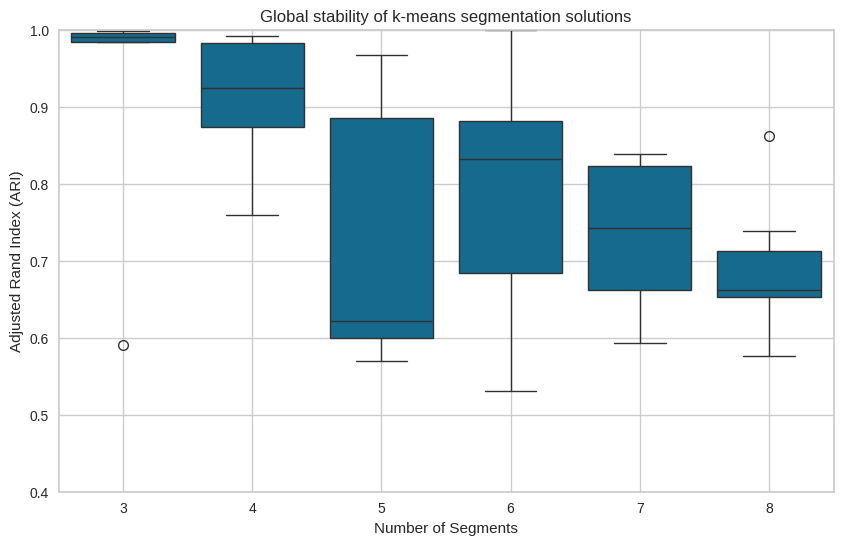

In [ ]:
# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")

# Parameters
num_segments = range(2, 9)
n_repeats = 10  # Number of times to repeat clustering for each k
results = []

for k in num_segments:
    for _ in range(n_repeats):
        kmeans = KMeans(n_clusters=k, random_state=None)
        kmeans.fit(df_copy)
        segment_solutions.append(kmeans)
        if k > 2:
            previous_labels = segment_solutions[-2].labels_
            current_labels = segment_solutions[-1].labels_
            ari = adjusted_rand_score(previous_labels, current_labels)
            results.append({'Segment Count': k, 'ARI': ari})

# Create a DataFrame for plotting
ari_df = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment Count', y='ARI', data=ari_df)
plt.ylim(0.4, 1.0)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.title('Global stability of k-means segmentation solutions')
plt.grid(True)
plt.show()

* From the Global stability of k-means segmentation solutions plotting, Although it is still unclear, but the number of optimal market segments appear to be 4.

> lets have a precise look using k-means.




###**Using K-Means Clustering Analysis** (elbow method)

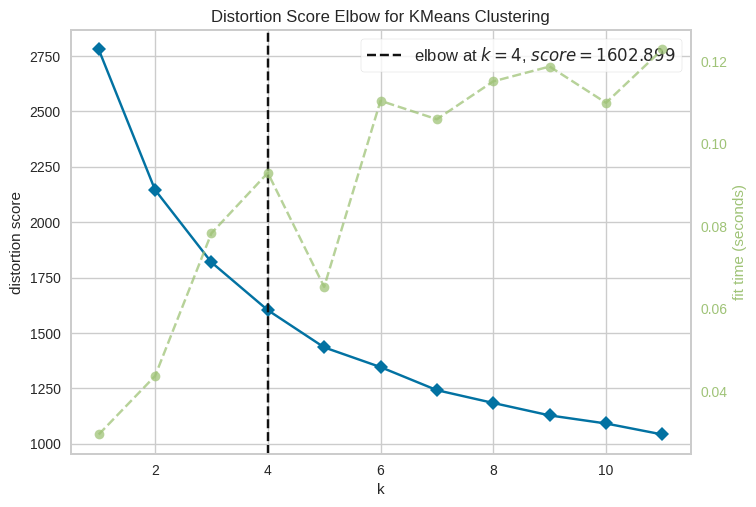

In [ ]:
# using k-means clustering analysis for extracting segments

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_copy)
visualizer.show();

* We find that Optimal Number of Clusters (Market Segments) is 4.

###Segment Level Stability Analysis with PCA plotting

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


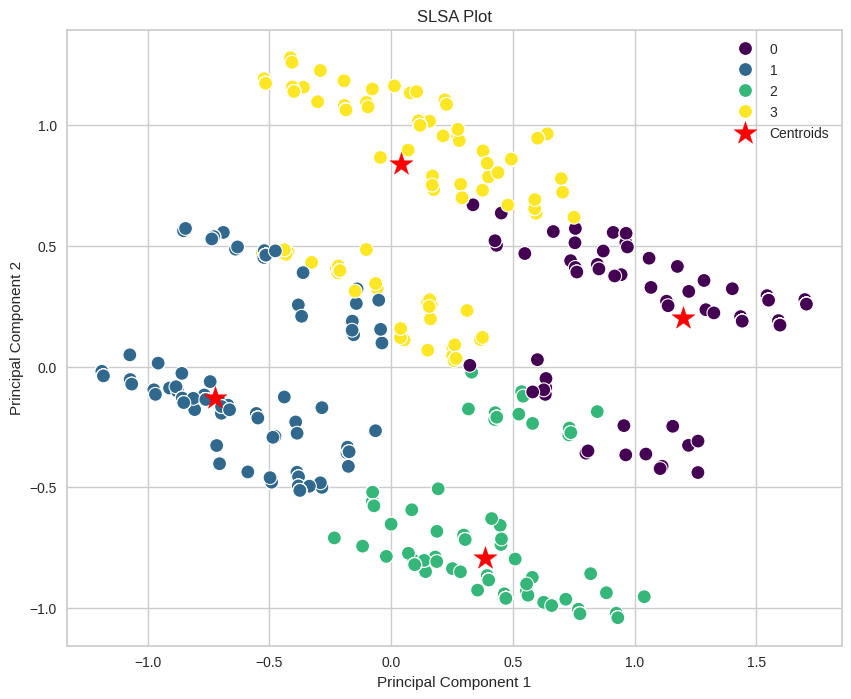

In [ ]:

# Perform PCA
pca_2d = PCA(n_components=2)
scores_2d = pca_2d.fit_transform(df_copy)

# K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_copy)
cluster_labels = kmeans.labels_

# Creating a DataFrame for plotting
df_plot = pd.DataFrame({
    'PC1': scores_2d[:, 0],
    'PC2': scores_2d[:, 1],
    'Cluster': cluster_labels
})

# Plotting the SLSA plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_plot, palette='viridis', s=100)
plt.title('SLSA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add cluster centers
centers = pca_2d.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300, c='red', label='Centroids')

plt.legend()
plt.show()



> We can gain further insights about the cluster seperation and centroids are positioned from the above plotting
---

## **Using Linear Regression**
>  To understand the differences in consumer perceptions (like how "yummy" or "cheap" a product is) between the two segments and how these perceptions influence their overall "Like" score.

* Let's preprocess the data in `'Like'` since certain ratings are comements included such as `I love it +5!` and `I hate it! -5`, We have to manage convert these object type to numeric(int), which would help perform numerical operations further.

In [ ]:
df = pd.read_csv('/content/mcdonalds.csv')
print(df['Like'].unique())

['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']


In [ ]:
#Replacing comments with proper scores
replacements = {
    'I love it!+5': '+5',
    'I hate it!-5': '-5'
}

df['Like'] = df['Like'].replace(replacements)

* Lets convert into numeric array elements

In [ ]:
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')
print(df['Like'].unique())


[-3  2  1  4  5 -5 -2  3  0 -4 -1]


###Checking through the updated `'Like'` data.

In [ ]:
print("Values in 'Like': ",df['Like'].unique(), "\n")

# Count the frequency of each number in the 'Like' column

like_counts = df['Like'].value_counts()


sorted_value_counts = like_counts.sort_index()

# Printing the sorted value counts
print("Value",sorted_value_counts)

Values in 'Like':  [-3  2  1  4  5 -5 -2  3  0 -4 -1] 

Value Like
-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: count, dtype: int64


> Defining the Independent and Dependent Variables

In [ ]:
# Define independent variables (perceptions)
X = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
X = sm.add_constant(X)  # Adds the intercept term to the model

# Define dependent variable
y = df['Like']


> Converting `Yes/No` responses to binary and Redefining the Independent Variables (X) followed by Scaling the Independent Variables and Fitting a Gaussian Mixture Model (GMM)

In [ ]:

#converting 'yes' 'no' responses to binary
columns_to_map = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap','tasty', 'expensive', 'healthy', 'disgusting']
df[columns_to_map] = df[columns_to_map].applymap({'Yes': 1, 'No': 0}.get)

# Redefine X with the updated df
X = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
X = sm.add_constant(X)  # Adds the intercept term to the model


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Gaussian Mixture Model (GMM) as a proxy for finite mixture of linear regression
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X_scaled)

# Predict segment labels
segments = gmm.predict(X_scaled)


In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male


> Fitting Linear Regression Models for Each Segment

In [ ]:

# Initialize dictionaries to store models
models = {}

for segment in range(2):
    segment_data = df[segments == segment]
    X_segment = segment_data[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
    y_segment = segment_data['Like']

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_segment, y_segment)
    models[segment] = model

    # Print model coefficients
    print(f"Segment {segment} coefficients: {model.coef_}")


Segment 0 coefficients: [ 2.40800121e+00  1.01921561e+00 -3.08501653e-01  2.22044605e-16
 -2.56891942e-01  1.77697872e-01  1.42519570e-01  1.36631211e+00
  5.46190093e-02  4.24219500e-01 -1.85590790e+00]
Segment 1 coefficients: [ 1.59787479e+00  1.36822639e+00 -2.79662359e-01  2.22044605e-16
 -4.62052554e-01  9.92094667e-01 -2.61276422e-01  1.87932720e+00
  5.11016814e-02  6.14568244e-01 -2.64092789e+00]


##Visualizing the Regression Coefficients

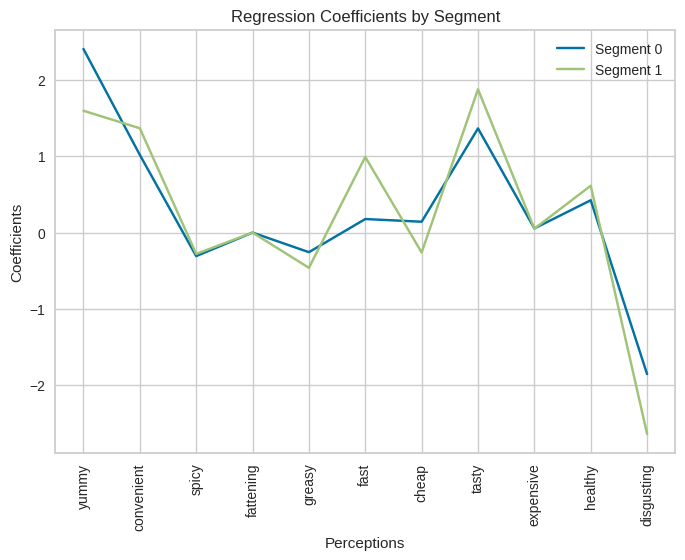

In [ ]:

coefficients = [models[segment].coef_ for segment in range(2)]
labels = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for i, coeff in enumerate(coefficients):
    plt.plot(labels, coeff, label=f'Segment {i}')

plt.xlabel('Perceptions')
plt.ylabel('Coefficients')
plt.title('Regression Coefficients by Segment')
plt.legend()
plt.xticks(rotation=90)
plt.show()


* **Observations:**
> * Members of `Segment 0` might prefer McDonald’s based on taste, speed, and value `(i.e, YUMMY, NOT FATTENNG, FAST, TASTY AND NOT DISUSTING)`. This segment could be targeted with promotions highlighting these aspects
 * Members of `Segment 1` values convenience and healthiness.`(i.e., YUMMY, CONVENIENT, NOT GREASY, HEALTHY,
and NOT DISGUSTING)` Marketing strategies could focus on these features to attract this segment.

---
##**Profiling Segments**
> Segment Profiling will help usvisualize and understand how different market segments perceive various attributes associated with McDonald's

###Hierarchical clustering of attributes

In [ ]:
df = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                  'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]

# Performing hierarchical clustering on the attributes
linkage_matrix = linkage(pdist(df.T), method='ward')
dendro = dendrogram(linkage_matrix, labels=df.columns, no_plot=True)

# Extract the optimal order of attributes
ordered_attributes = [df.columns[i] for i in dendro['leaves']]


### K-Means Segmentation

In [ ]:
#Getting prior performed K_means clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
segments = kmeans.fit_predict(df)
df['Segment'] = segments


###Visualising Segment Profile

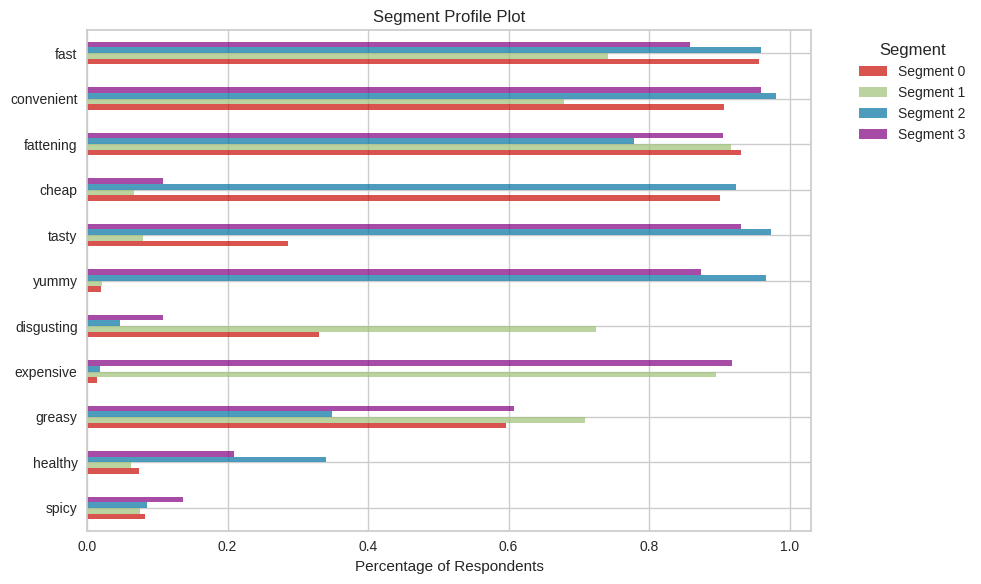

In [ ]:
# Calculating the percentage of respondents who associate each perception with McDonald's for each segment
segment_profiles = df.groupby('Segment')[ordered_attributes].mean()

# # Calculate the overall market percentages
# overall_percentages = df[ordered_attributes].mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
segment_profiles.T.plot(kind='barh', ax=ax, color=['r', 'g', 'b', 'purple'], alpha=0.7)

ax.set_xlabel('Percentage of Respondents')
ax.set_title('Segment Profile Plot')
ax.set_yticklabels(ordered_attributes)

plt.legend([f'Segment {i}' for i in range(len(segment_profiles))],
           bbox_to_anchor=(1.05, 1), loc='upper left', title='Segment')
plt.tight_layout()
plt.show()


>The Segment profile shows how each segment differs in terms of key attributes

###Segment Seperation Plot

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


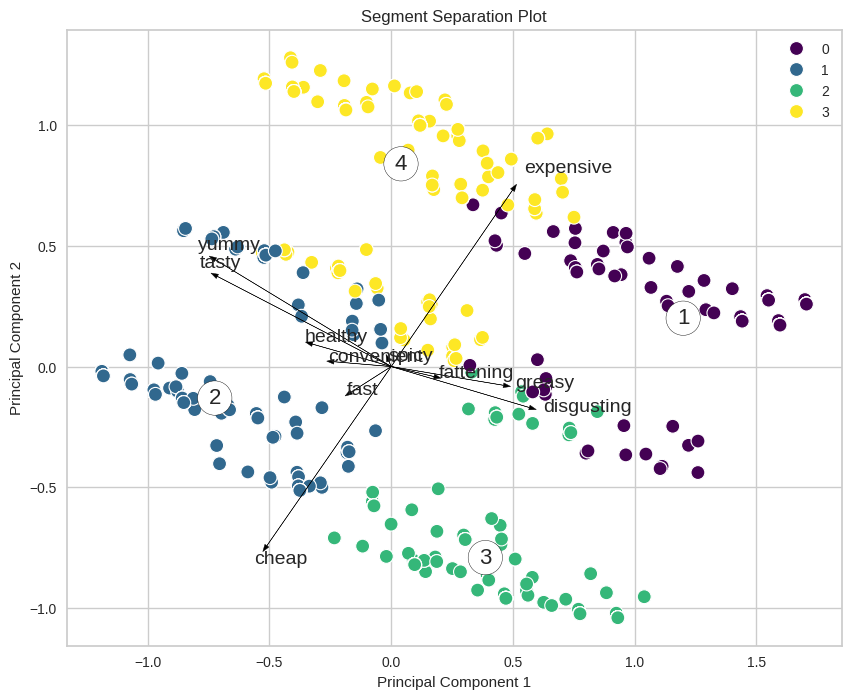

In [ ]:

# Performing PCA
pca_2d = PCA(n_components=2)
scores_2d = pca_2d.fit_transform(df_copy)

# K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_copy)
cluster_labels = kmeans.labels_

# Get the PCA loadings
loadings = pca_2d.components_.T * np.sqrt(pca_2d.explained_variance_)

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'PC1': scores_2d[:, 0],
    'PC2': scores_2d[:, 1],
    'Cluster': cluster_labels
})



# Plot the segment separation plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_plot, palette='viridis', s=100)
plt.title('Segment Separation Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add arrows for attribute loadings
arrow_length = 2  # Customize arrow length
fontsize = 14  # Customize font size
for i, attribute in enumerate(df_copy.columns):
    plt.arrow(0, 0, loadings[i, 0] * arrow_length, loadings[i, 1] * arrow_length,
              head_width=0.02, head_length=0.03, fc='black', ec='black')
    plt.text(loadings[i, 0] * arrow_length * 1.1, loadings[i, 1] * arrow_length * 1.1,
             attribute, fontsize=fontsize)

# Add encircled numbers for cluster centers
centers = pca_2d.transform(kmeans.cluster_centers_)
for i, (x, y) in enumerate(centers):
    plt.text(x, y, str(i+1), fontsize=16, ha='center', va='center',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'))

plt.legend()
plt.show()


 **Observations:**
> * Segments 1 and 4 both view McDonald’s as Expensive.
* Segments 2 and 3 view McDonald’s as Cheap.

---
## **Describing Segments**
>This section outlines how to use various visualization techniques to analyze and understand market segments based on the McDonald's dataset

>First let's preprocess and retrieve back all required data with the original dataset for processing

In [ ]:
df_like = pd.read_csv('/content/mcdonalds.csv')
print(df_like['Like'].unique())
replacements = {
    'I love it!+5': '+5',
    'I hate it!-5': '-5'
}

df_like['Like'] = df_like['Like'].replace(replacements)
like_df = df_like[['Like']].copy()

# Concatenate the 'Like' DataFrame
df = pd.concat([df, like_df], axis=1)

df['Like'] = pd.to_numeric(df['Like'], errors='coerce')
print(df['Like'].unique())
df['Like'].unique()

['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
[-3  2  1  4  5 -5 -2  3  0 -4 -1]


array([-3,  2,  1,  4,  5, -5, -2,  3,  0, -4, -1])

In [ ]:
df_new= pd.read_csv('/content/mcdonalds.csv')

df_selected = df_new[['Age', 'VisitFrequency', 'Gender']]
df = pd.concat([df, df_selected], axis=1)
df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Segment,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,3,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,3,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,2,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,0,2,49,Once a month,Male


### Cross tab for like and segment membership

In [ ]:
# Creating a cross-tabulation of 'Like' and 'Segment'
crosstab = pd.crosstab(df['Like'], df['Segment'])

# Print the cross-tabulation
crosstab


Segment,0,1,2,3
Like,,,,
-5,56,89,2,5
-4,38,27,3,3
-3,35,30,1,7
-2,29,18,6,6
-1,30,12,10,6
0,66,36,34,33
1,46,14,51,41
2,44,6,79,58
3,17,8,138,66


###Visualising like vs segment membership

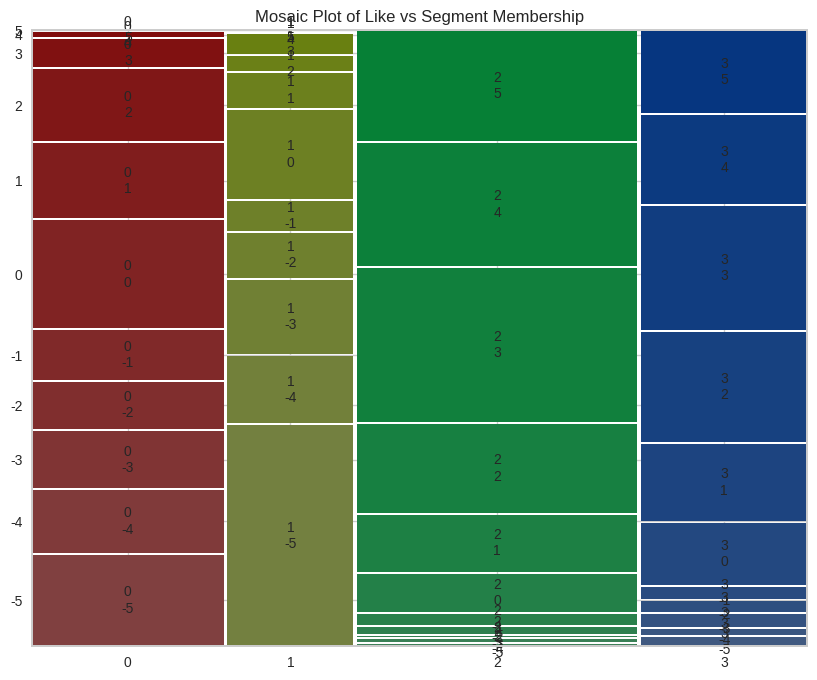

In [ ]:
crosstab = pd.crosstab(df['Segment'], df['Like'])

# Create the mosaic plot
plt.rcParams['figure.figsize'] = (10, 8)
mosaic(crosstab.stack(), title='Mosaic Plot of Like vs Segment Membership')
plt.show()


**Observations:**
> * Segment 1: Has a higher concentration of negative Like values, especially at -5 and -4.
* Segment 2 and 3 shows tendency towards positive Like values, but with some distribution across the negative and neutral range as well.

###Cross tab for gender vs segement

In [ ]:
# Cross-tabulating segment membership and gender
crosstab_gender = pd.crosstab(df['Segment'], df['Gender'])

# Print the cross-tabulation
crosstab_gender


Gender,Female,Male
Segment,,
0,213,151
1,101,139
2,324,209
3,150,166


###Visualising gender vs segment membership

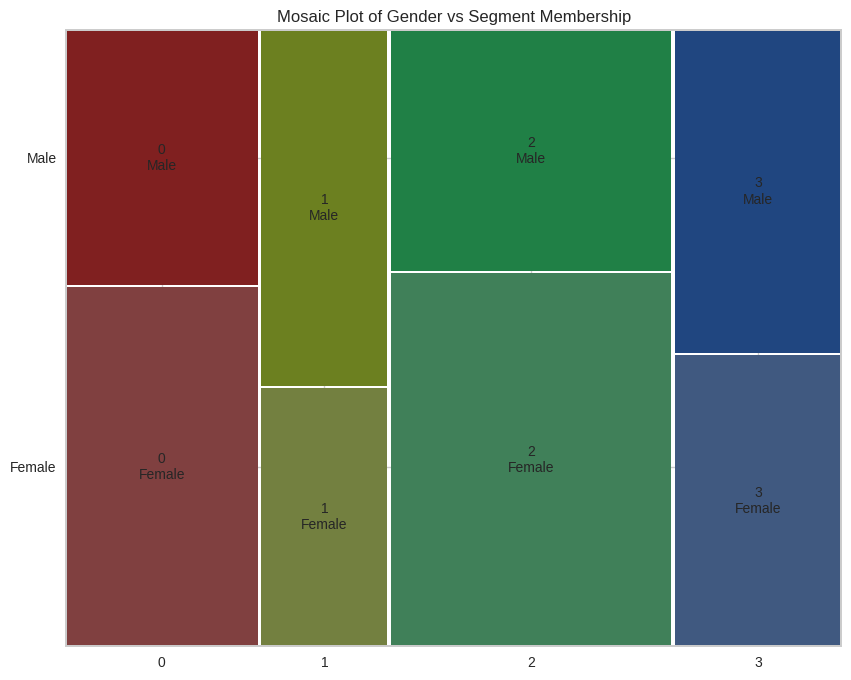

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)
mosaic(crosstab_gender.stack(), title='Mosaic Plot of Gender vs Segment Membership')
plt.show()


**Observations:**
> * Segment 0: More females (213) than males (151).
* Segment 1: More males (139) than females (101).
* Segment 2: Significantly more females (324) than
  males (209).
* Segment 3: A relatively balanced distribution,  
  with slightly more males (166) than females (150).

###Box plot for age vs segment membership

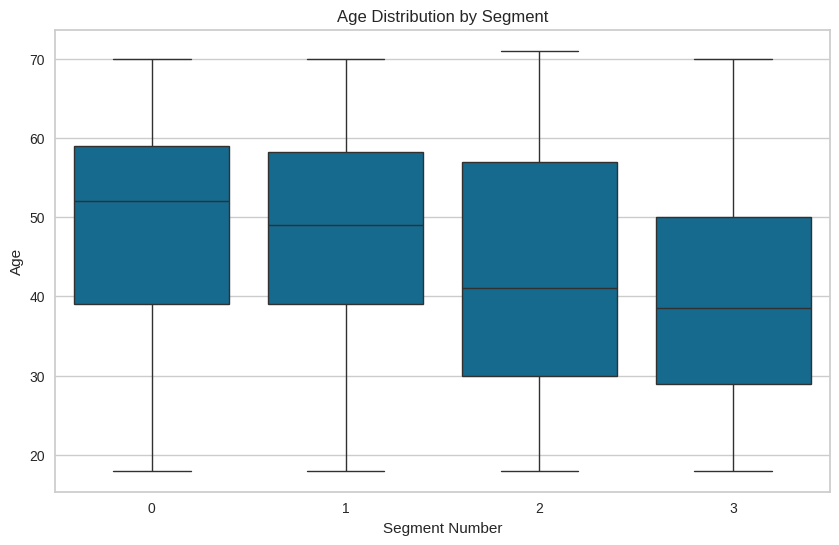

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Age', data=df)
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.title('Age Distribution by Segment')
plt.show()


**Observations:**
> *  We see
 that the notches do not overlap, suggesting significant differences in
average age across segments.

---
##**Selecting the Target Segments**
>Through segment evaluation plot will give insights into assessing and comparing different customer segments to identify which segments are most attractive based on their visit frequency

###Conditional Inference Tree implementation using Decision Tree

>Data Preprocessing

In [ ]:
visit_frequency_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4
}
df['VisitFrequencyNumeric'] = df['VisitFrequency'].map(visit_frequency_mapping)


In [ ]:
#lets keep a copy of the dataset for processing
dfc = df.copy()

###Defining the independent variables (predictors) and the dependent variable (target), Fitting, and Plotting the result Decision Tree.

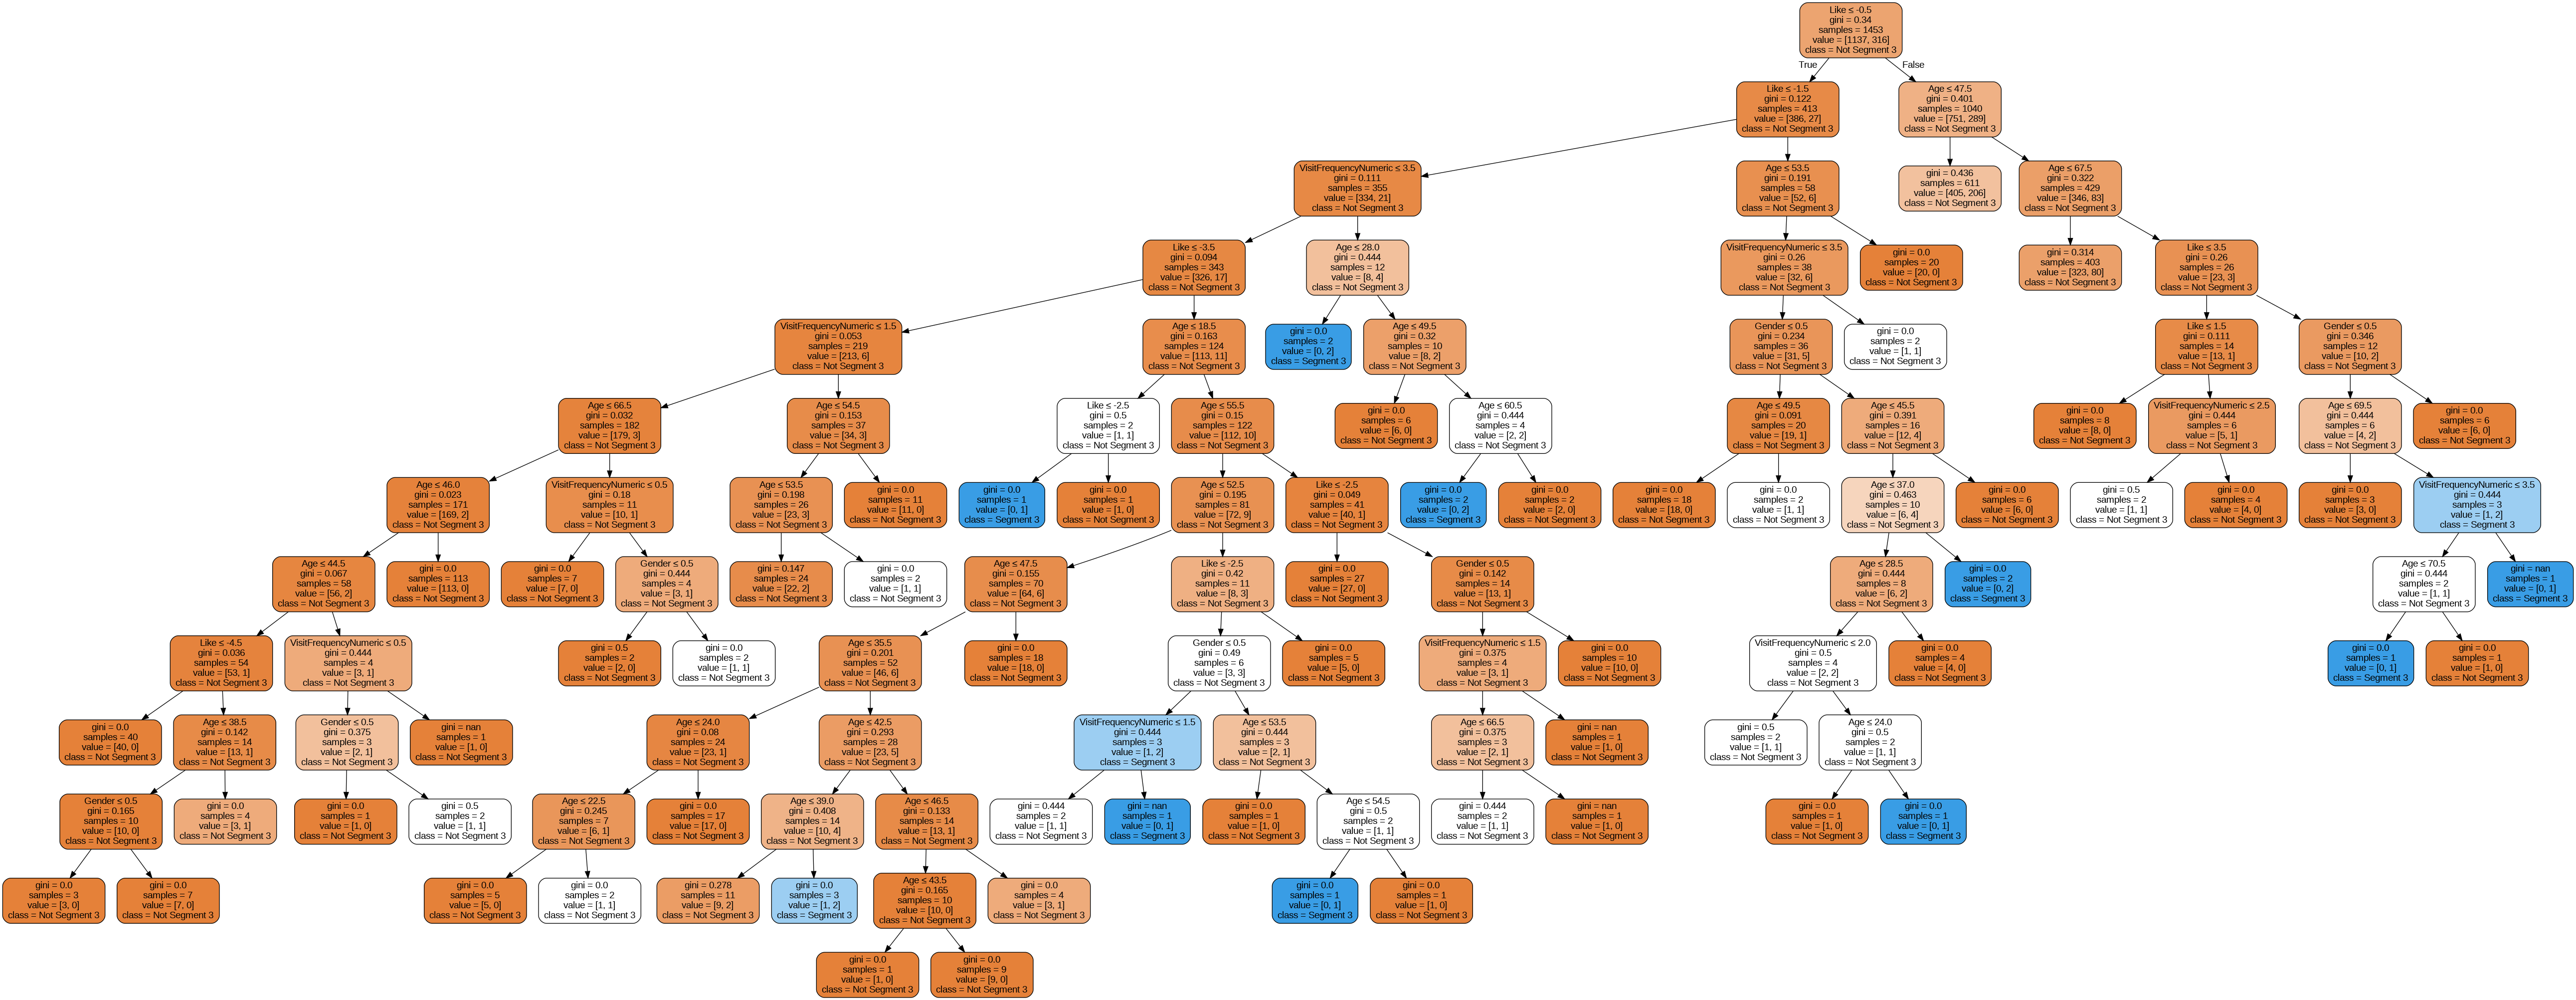

In [ ]:


# Convert Segment membership to binary: 1 if Segment == 3, else 0
df['Segment_3'] = (df['Segment'] == 3).astype(int)

# Convert categorical variable Gender to numeric
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Convert VisitFrequency to numeric
df['VisitFrequencyNumeric'] = df['VisitFrequency'].map(visit_frequency_mapping)

# Define the independent variables (predictors) and the dependent variable (target)
X = df[['Like', 'Age', 'VisitFrequencyNumeric', 'Gender']]
y = df['Segment_3']

# Fit the Decision Tree model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Export the tree to DOT format
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X.columns,
                           class_names=["Not Segment 3", "Segment 3"],
                           filled=True, rounded=True,
                           special_characters=True)

# Create a Graphviz Source object and save it as a PNG file
graph = graphviz.Source(dot_data)
png_path = '/content/decision_tree.png'
graph.render(filename='/content/decision_tree', format='png', cleanup=True)

# Display the PNG image
img = Image(filename=png_path)
display(img)

# print(export_text(tree, feature_names=list(X.columns)))

**Observations:**
> * The tree splits are based on Like, VisitFrequencyNumeric, and Age, while Gender is not included in the splits.
* Respondents who like McDonald’s and are young, or those who don’t like McDonald’s but visit frequently `(Age <= 18)`
* `Like > -0.50` Respondents who like McDonald’s more have a different set of rules, often involving age and visit frequency to determine if they fall into Segment 3.
* Respondents with a very low liking score and infrequent visits are almost certainly not in Segment 3.

###Segment Evaluation Plot

>Data Preprocessing

In [ ]:
# Convert gender to numeric
dfc['Female'] = (dfc['Gender'] == 'Female').astype(int)
# Calculate mean values for each segment using the numeric visit frequency
visit_mean = dfc.groupby('Segment')['VisitFrequencyNumeric'].mean()
like_mean = dfc.groupby('Segment')['Like'].mean()
female_mean = dfc.groupby('Segment')['Female'].mean()


###Visualization

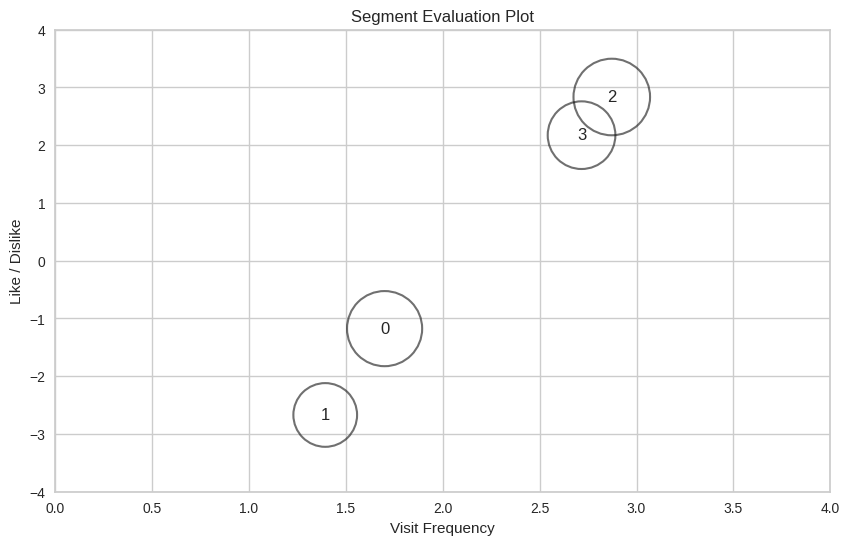

In [ ]:
plt.figure(figsize=(10, 6))

# Plot rings
plt.scatter(
    visit_mean,
    like_mean,
    s=5000 * female_mean,  # Control the size of the rings
    alpha=0.6,
    #c=['purple', 'blue', 'green', 'r'],  # Color of the ring outlines
    edgecolors='k',  # Edge color
    linewidth=1.5,  # Width of the ring's outline
    facecolors='none',  # Make the face of the circles transparent, creating rings
    marker='o'  # Ensure markers are circles
)

# Add labels
for i in visit_mean.index:
    plt.text(visit_mean[i], like_mean[i], str(i), fontsize=12, ha='center', va='center')

# Set axis limits
plt.xlim(0, 4)  # Adjusted for the numeric range of visit frequency
plt.ylim(-4, 4)

# Set axis labels and title
plt.xlabel('Visit Frequency')
plt.ylabel('Like / Dislike')
plt.title('Segment Evaluation Plot')

# Display plot
plt.grid(True)
plt.show()

**Observations**
> * Segments 3 and 4: These segments visit McDonald's frequently and have a positive attitude toward the brand. They are in the "attractive" quadrant of the plot. They should be retained and their preferences and needs should be prioritized, as they represent the most valuable customer base.
* Segment 2: This segment visits McDonald's infrequently and has a negative attitude towards the brand. They are in the "least attractive" quadrant. This segment is less valuable as a target for marketing efforts, and McDonald's might want to consider strategies to improve their perception or focus on more promising segments.